In [1]:
# Import modules: 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set-up font size for all the graphs:
fs_label = 20
parameters = {                
                'figure.titlesize': fs_label+6,
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label
             }
plt.rcParams.update(parameters)

In [3]:
# Define a function with the three SIR equations:
def S_I_R(z, t, b, v):
    S, I, R = z
    dSdt = -b * S * I
    dIdt = b * S * I - v * I
    dRdt = v * I
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt

In [4]:
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark

v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
par = (b, v) # put parameters in a tuple to use in the ODE

t_max = 1000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 
# I used t_max + 1 for the step number so that I get exactly t_max days as timesteps, without funny decimal points

In [5]:
# Solve the differential equation
ns = odeint(S_I_R, z0, t, args = par) 

# # If I leave it like this, I can access the variables this way:
#     # S: ns[:,0], I: ns[:,1], R: ns[:,2] # this is also quite similar to what we did in Matlab

# Instead, I will use Christian's idea to transpose ns and then extract the variables:
S, I, R = ns.T

In [6]:
# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] # when does it peak?
Imax = np.int(np.amax(I)) # maximum infected
outbreak_duration = outbreak_end  - outbreak_start # how long does it last?
not_sick = np.int(np.amin(S)) # number of susceptible people at equilibrium 
not_sick_percentage = np.round(100 * not_sick / N0, 2) # find the persentage of not sick and round to 2 decimals
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) # day when equations reach equilibrium

In [7]:
clr = ['royalblue', 'lightcoral', 'mediumseagreen']
lbl = ['Susceptibles', 'Infected', 'Immune']

In [8]:
def print_parameters():
    print(f'Transmission rate β: {b}.')
    print(f'Epidemic peaks at day {np.int(outbreak_peak)}.') 
    print(f'At peak, {Imax} persons were infected per day.')
    print(f'Epidemic lasts {outbreak_duration} days (I > 0.01 of Imax).')
    print(f'{not_sick} persons did not get sick, i.e. {not_sick_percentage}% of the Danish population.')

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 218.
At peak, 707359 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605416 persons did not get sick, i.e. 26.76% of the Danish population.


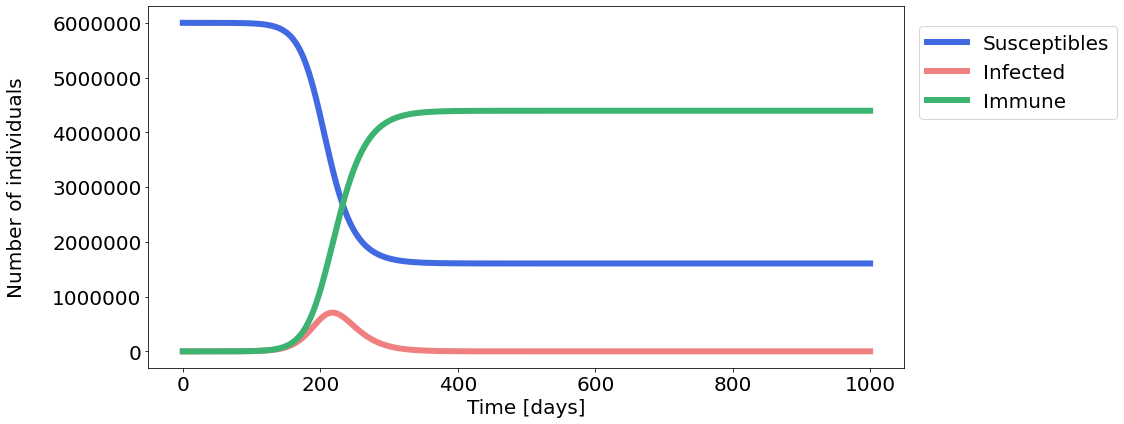

In [9]:
# a. Solve the equations and plot the solutionss
# b. Duration and peak of epidemic, fraction of not sick people at the end

# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

# ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
# ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
# ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
# ax.set_title('Covid-19 Epidemic in Denmark\n')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals\n')
ax.legend(loc='upper center', bbox_to_anchor=(1.15, 1), borderaxespad=1) # place legend outside the graph

print_parameters()

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 218.
At peak, 707359 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605416 persons did not get sick, i.e. 26.76% of the Danish population.


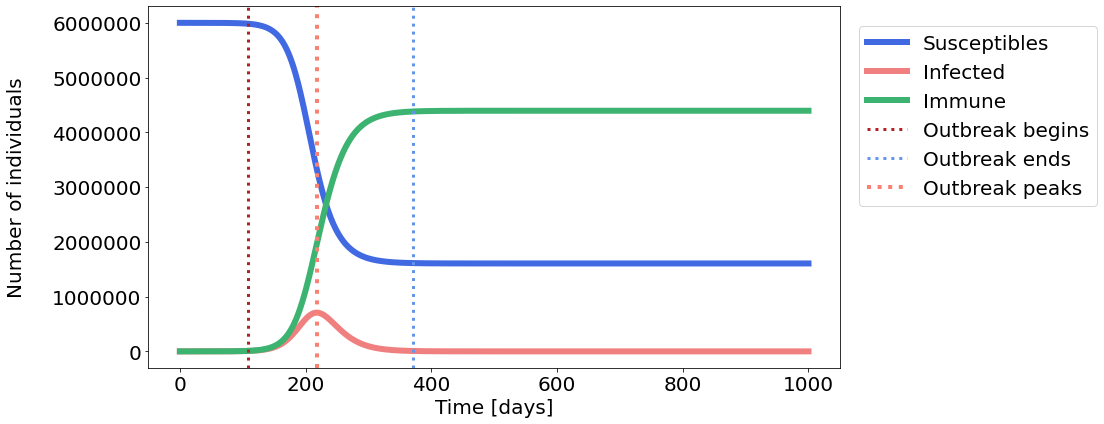

In [10]:
# a. Solve the equations and plot the solutionss
# b. Duration and peak of epidemic, fraction of not sick people at the end

# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark\n')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals\n')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph

print_parameters()

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 182.
At peak, 899711 persons were infected per day.
Epidemic lasts 224 days (I > 0.01 of Imax).
1252375 persons did not get sick, i.e. 20.87% of the Danish population.
2.357136964300446e-08


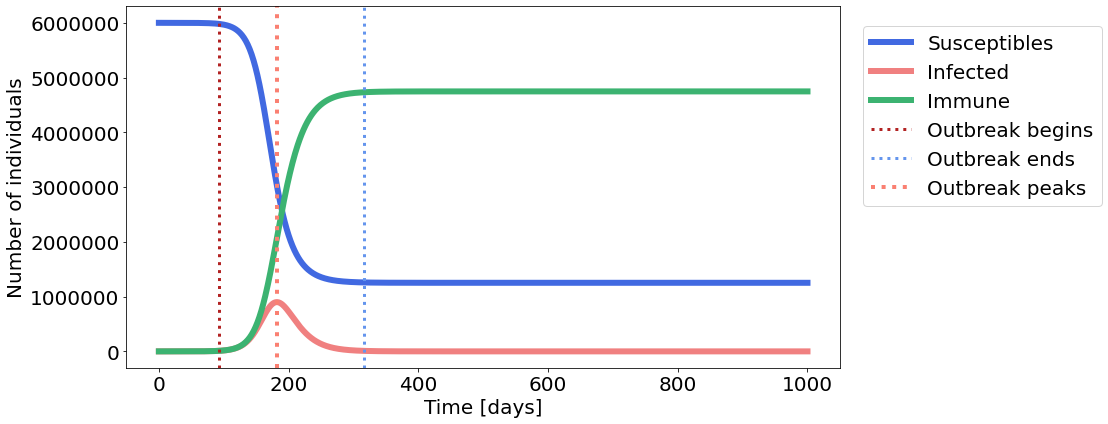

In [11]:
# b. increase b by 10%
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
t_max = 1000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

b_incr = b + b*0.1
par = (b_incr, v)

# Solve the differential equation
ns = odeint(S_I_R, z0, t, args = par)
S, I, R = ns.T

# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] # when does it peak?
Imax = np.int(np.amax(I)) # maximum infected
outbreak_duration = outbreak_end  - outbreak_start # how long does it last?
not_sick = np.int(np.amin(S)) # number of susceptible people at equilibrium 
not_sick_percentage = np.round(100 * not_sick / N0, 2) # find the persentage of not sick and round to 2 decimals
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) # day when equations reach equilibrium

# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph

print_parameters()
print(b_incr)

Transmission rate β: 2.1428517857276783e-08
Epidemic peaks at 182 days with 899711 persons infected per day. (Day 0 is at the initial 15 infections)
Epidemic lasts 224 days (I > 0.01 of Imax)
1252375 persons did not get sick, i.e. 20.87% of the Danish population


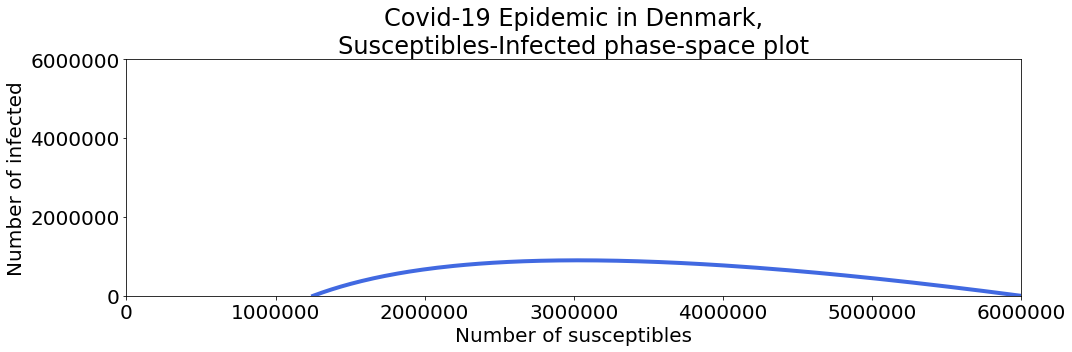

In [12]:
# c. Phase space plot:

# Plot:
fig, ax = plt.subplots(figsize=(15,5), tight_layout=True)

ax.plot(S, I, color = 'royalblue', linewidth=4)

ax.set_ylim(0, N0)
ax.set_xlim(0,N0)

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Number of susceptibles')
ax.set_ylabel('Number of infected')
ax.set_title('Covid-19 Epidemic in Denmark,\nSusceptibles-Infected phase-space plot')

print(f'Transmission rate β: {b}')
print(f'Epidemic peaks at {np.int(outbreak_peak)} days with {Imax} persons infected per day. (Day 0 is at the initial 15 infections)')
print(f'Epidemic lasts {outbreak_duration} days (I > 0.01 of Imax)')
print(f'{not_sick} persons did not get sick, i.e. {not_sick_percentage}% of the Danish population')

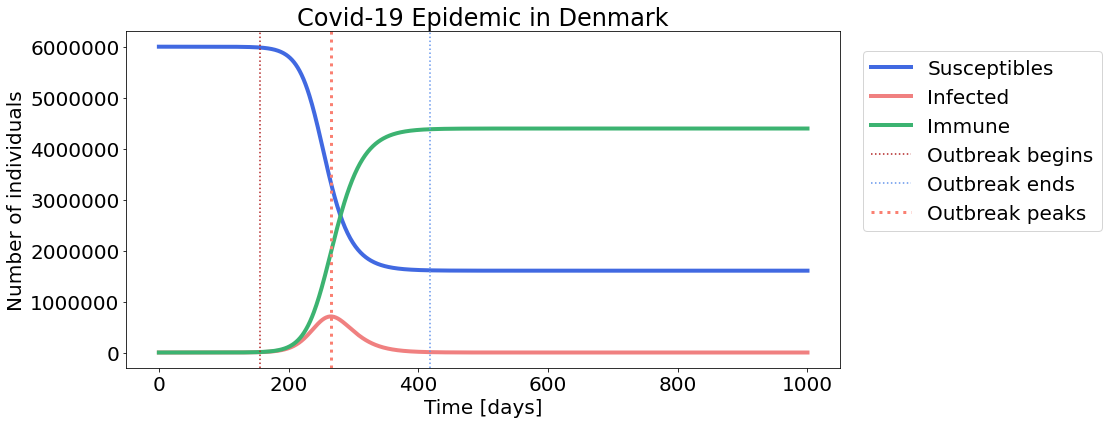

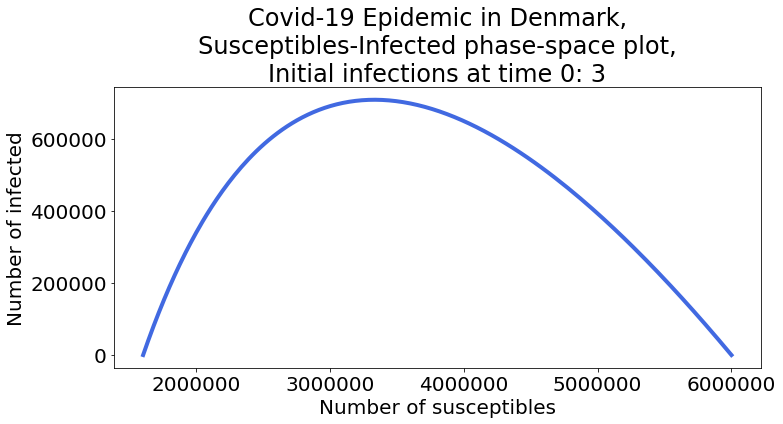

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 265.
At peak, 707373 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605419 persons did not get sick, i.e. 26.76% of the Danish population.


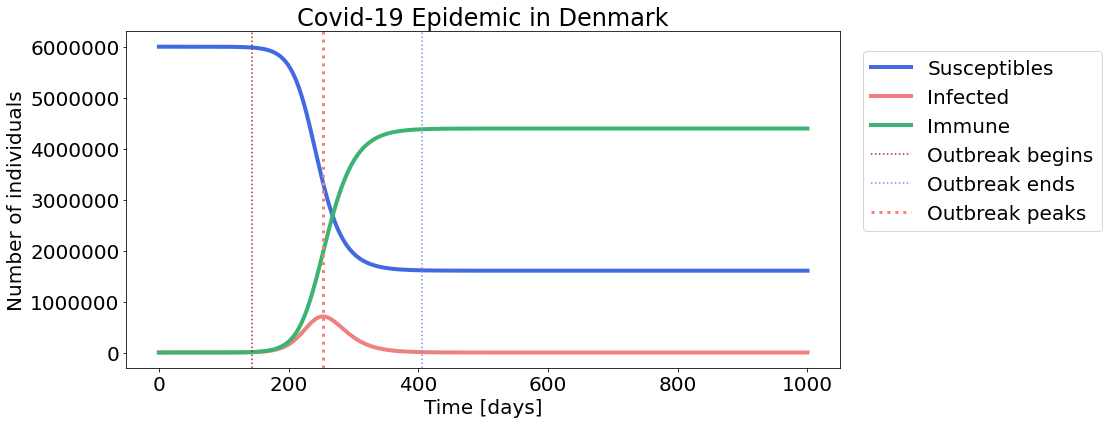

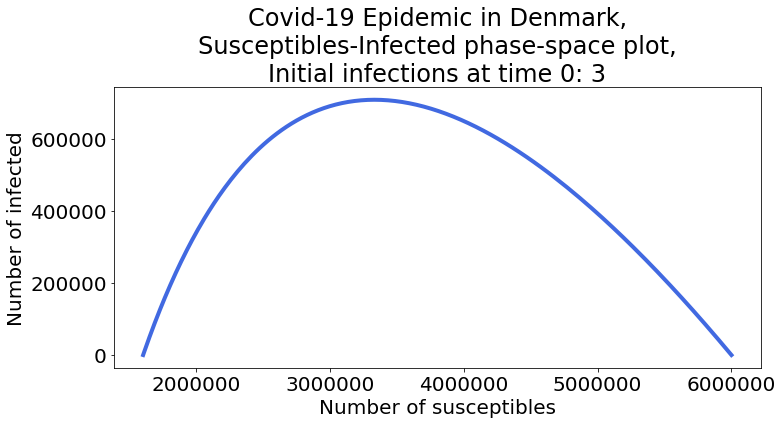

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 253.
At peak, 707379 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605418 persons did not get sick, i.e. 26.76% of the Danish population.


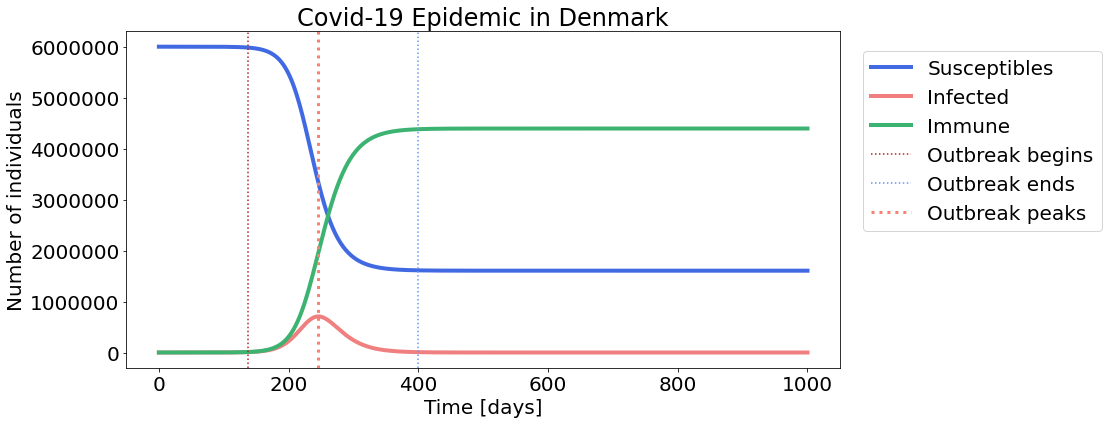

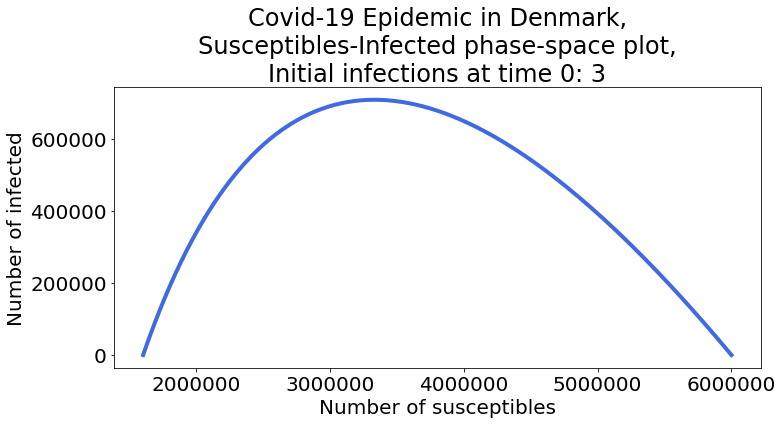

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 246.
At peak, 707376 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605417 persons did not get sick, i.e. 26.76% of the Danish population.


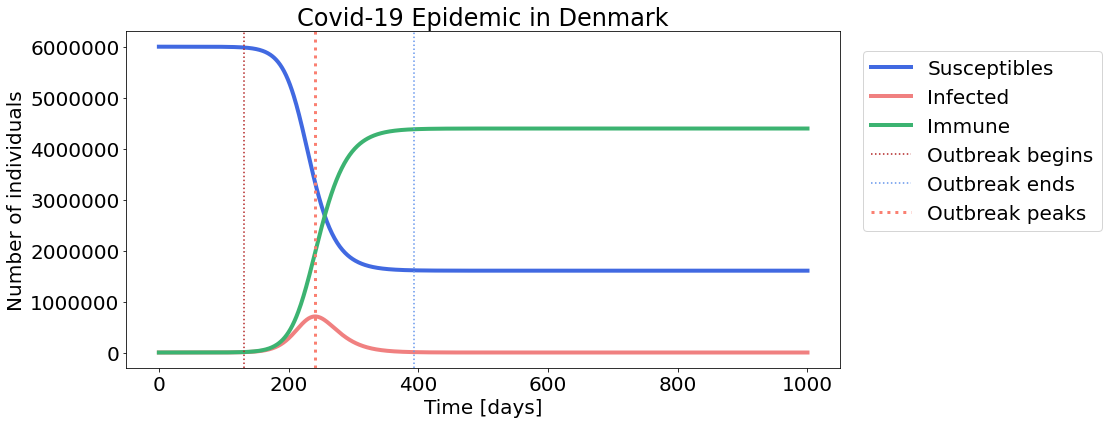

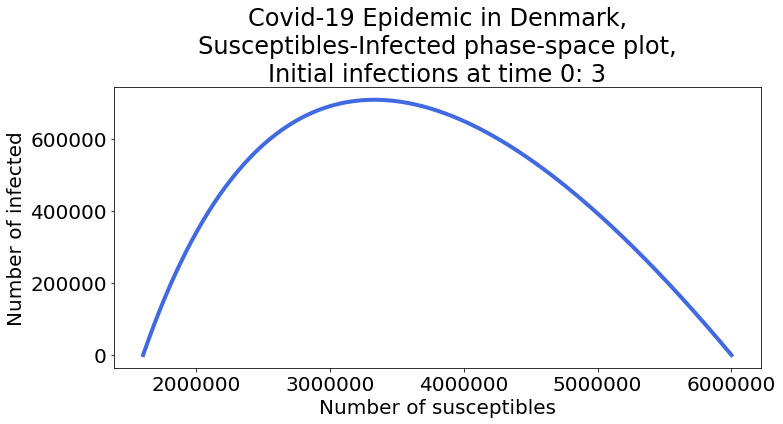

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 241.
At peak, 707374 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605416 persons did not get sick, i.e. 26.76% of the Danish population.


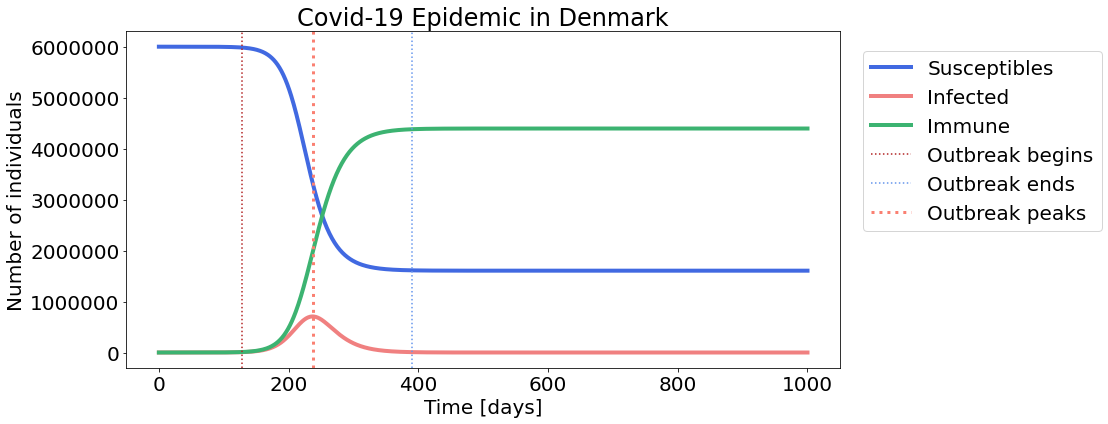

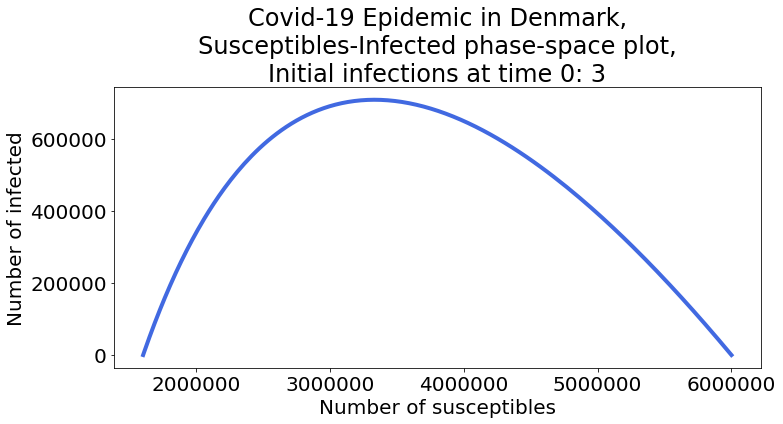

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 237.
At peak, 707381 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605415 persons did not get sick, i.e. 26.76% of the Danish population.


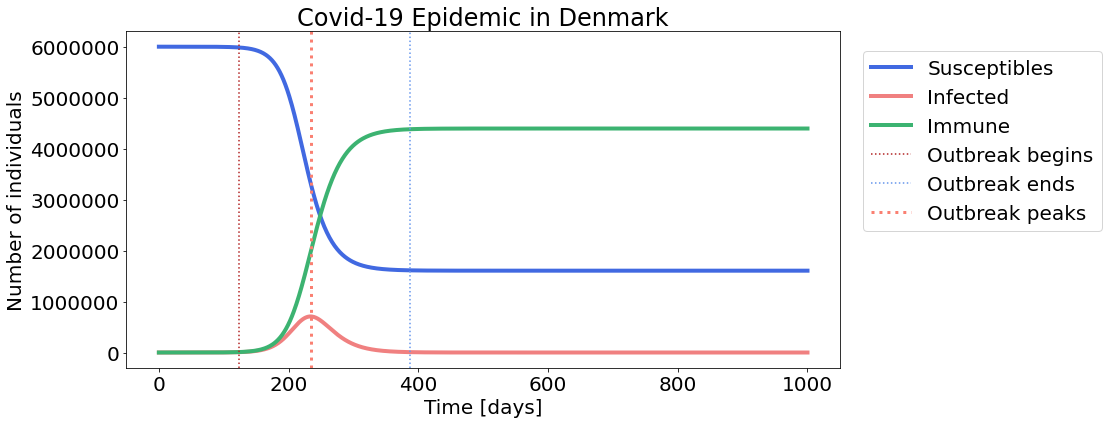

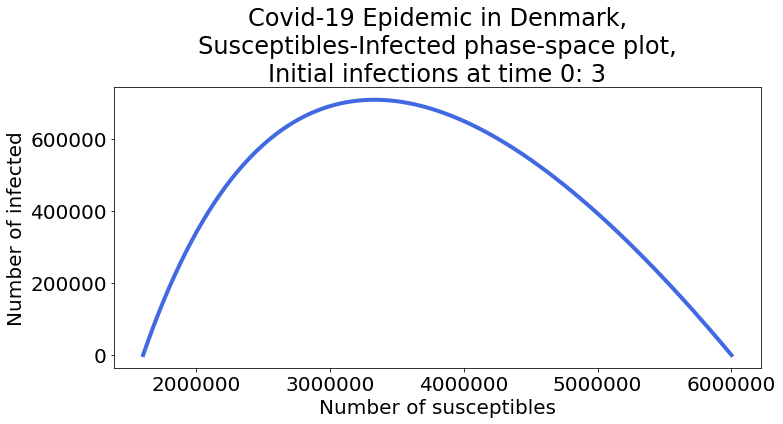

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 234.
At peak, 707362 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605414 persons did not get sick, i.e. 26.76% of the Danish population.


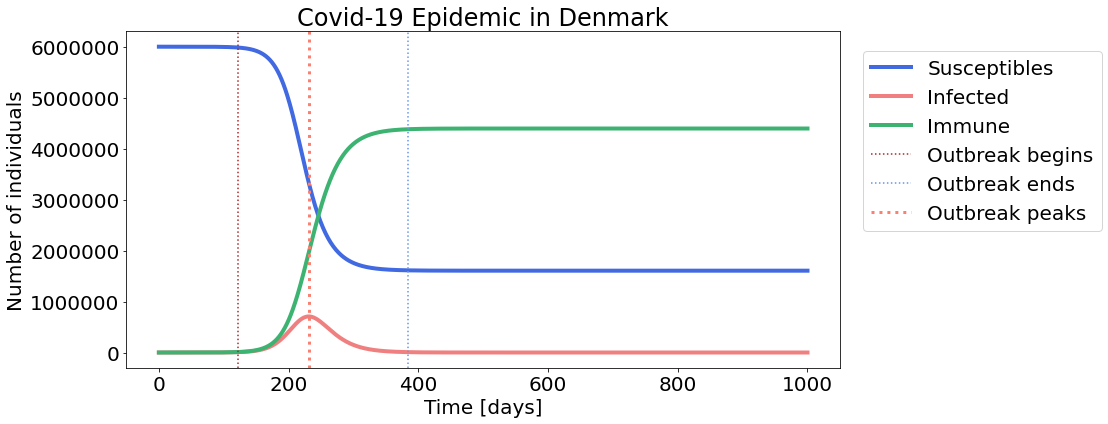

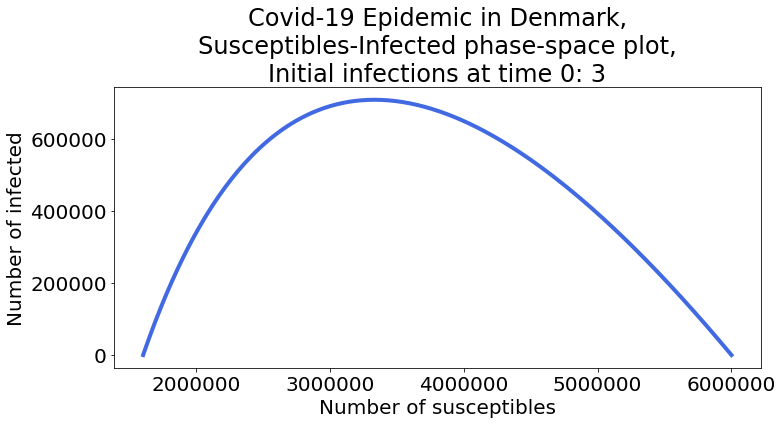

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 231.
At peak, 707383 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605413 persons did not get sick, i.e. 26.76% of the Danish population.


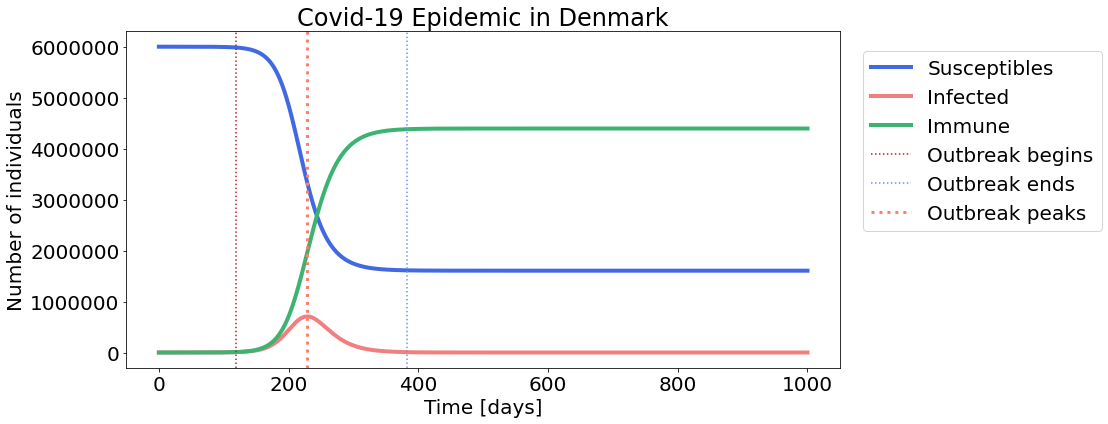

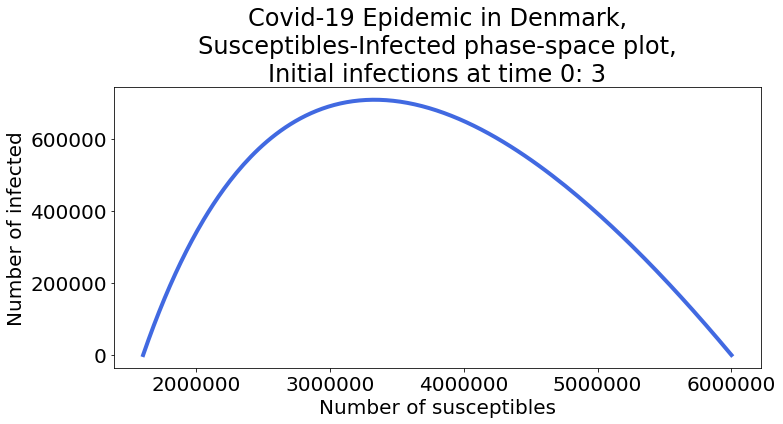

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 229.
At peak, 707357 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605412 persons did not get sick, i.e. 26.76% of the Danish population.


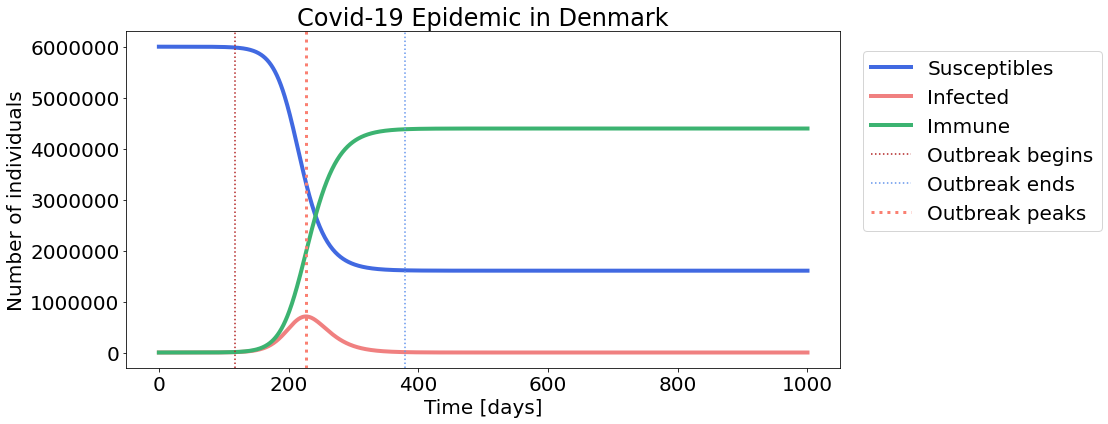

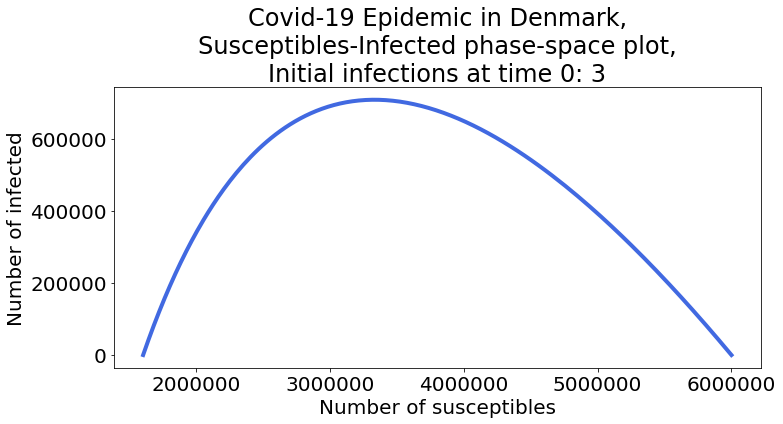

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 227.
At peak, 707344 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605411 persons did not get sick, i.e. 26.76% of the Danish population.


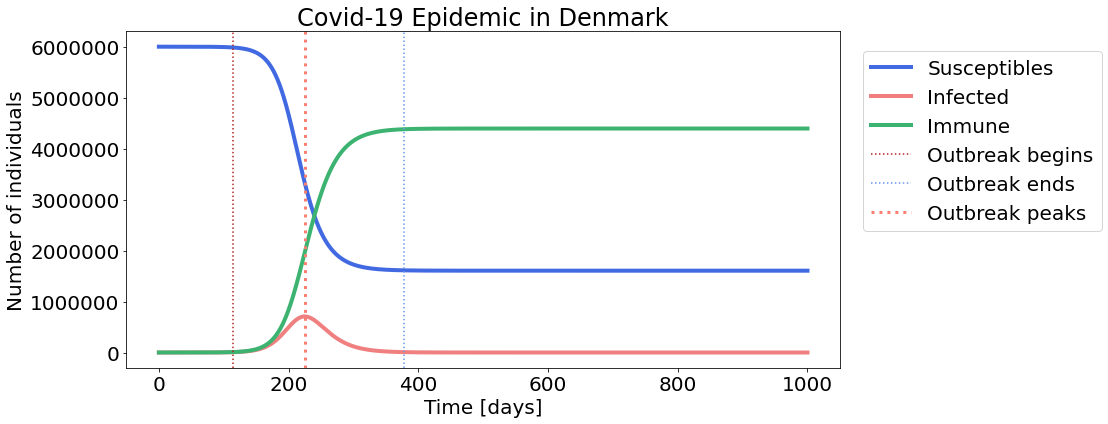

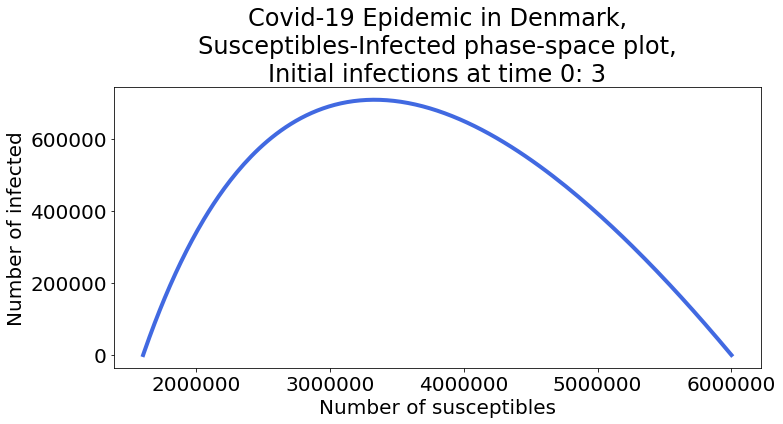

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 225.
At peak, 707375 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605410 persons did not get sick, i.e. 26.76% of the Danish population.


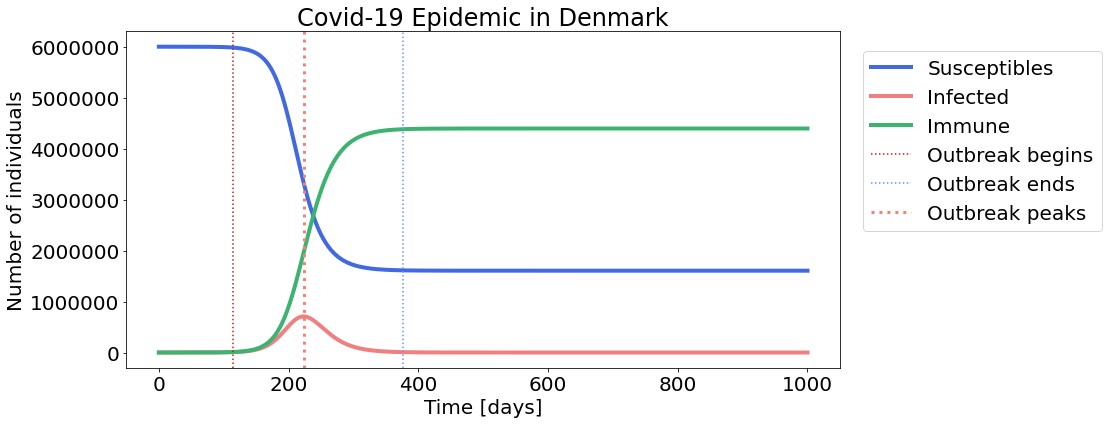

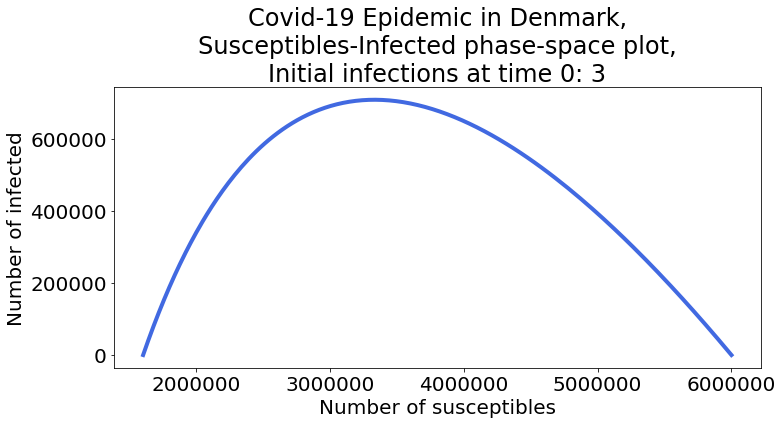

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 223.
At peak, 707379 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605409 persons did not get sick, i.e. 26.76% of the Danish population.


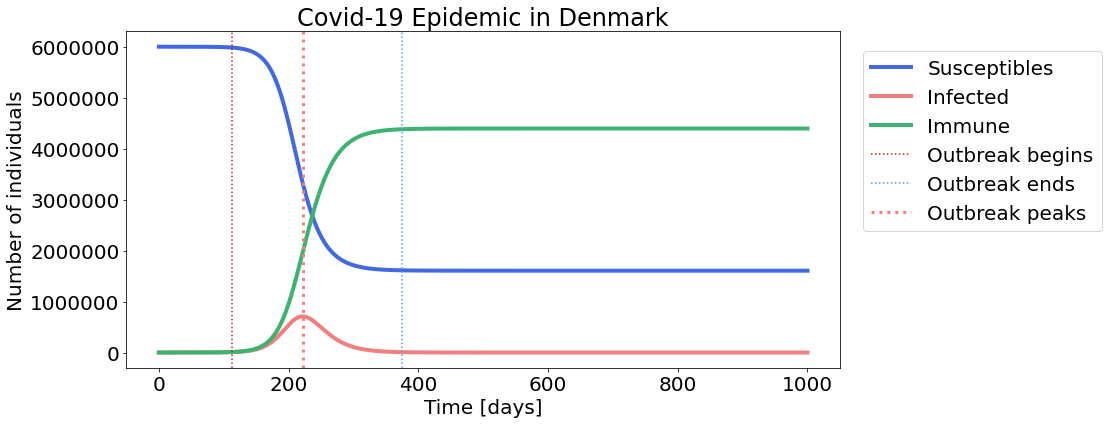

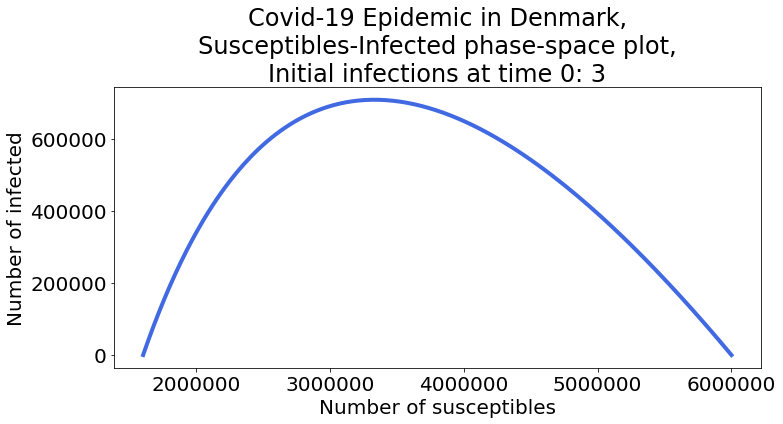

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 222.
At peak, 707337 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605409 persons did not get sick, i.e. 26.76% of the Danish population.


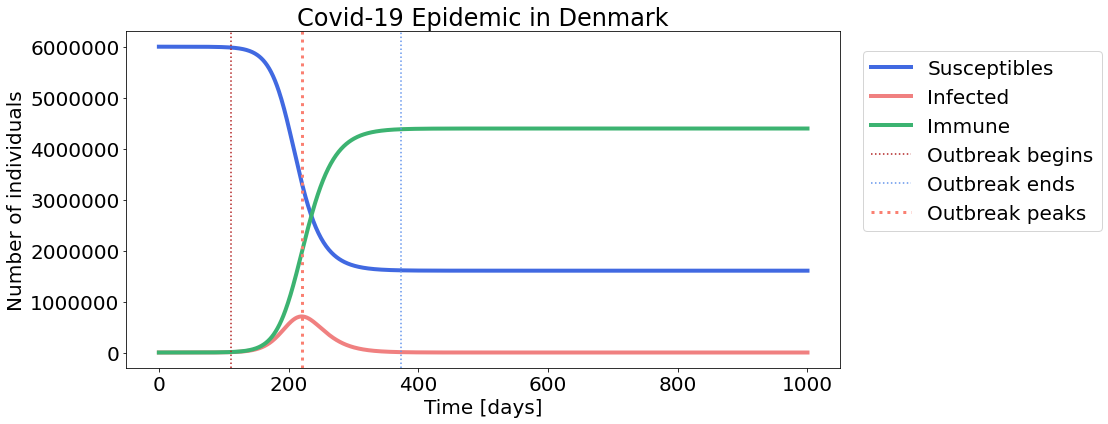

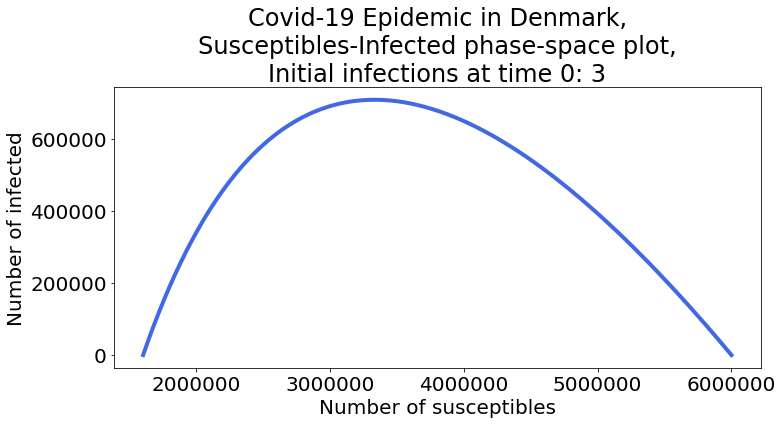

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 220.
At peak, 707370 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605408 persons did not get sick, i.e. 26.76% of the Danish population.


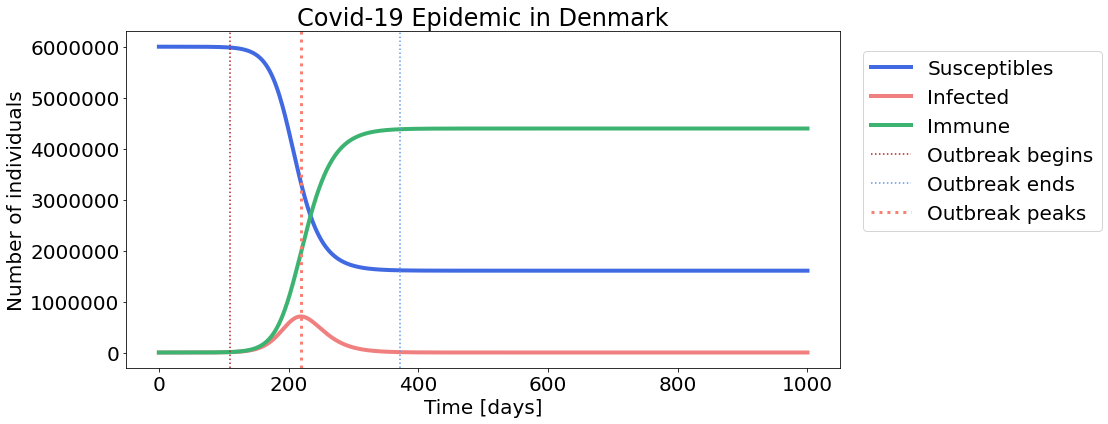

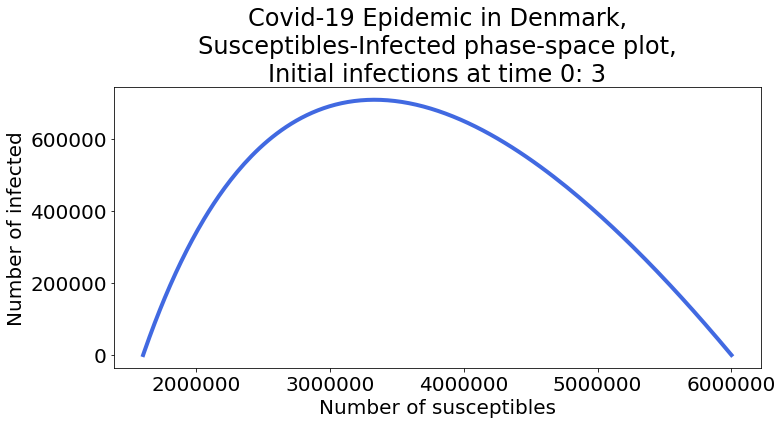

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 219.
At peak, 707390 persons were infected per day.
Epidemic lasts 262 days (I > 0.01 of Imax).
1605407 persons did not get sick, i.e. 26.76% of the Danish population.


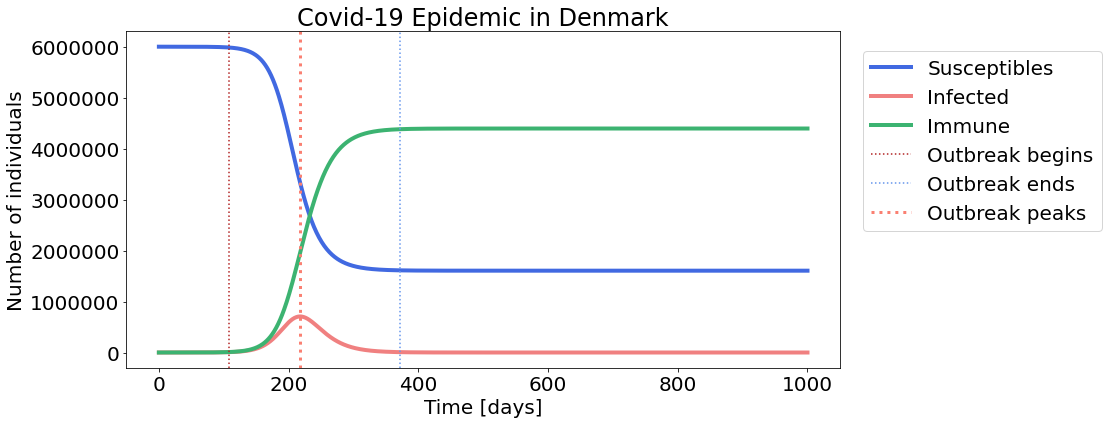

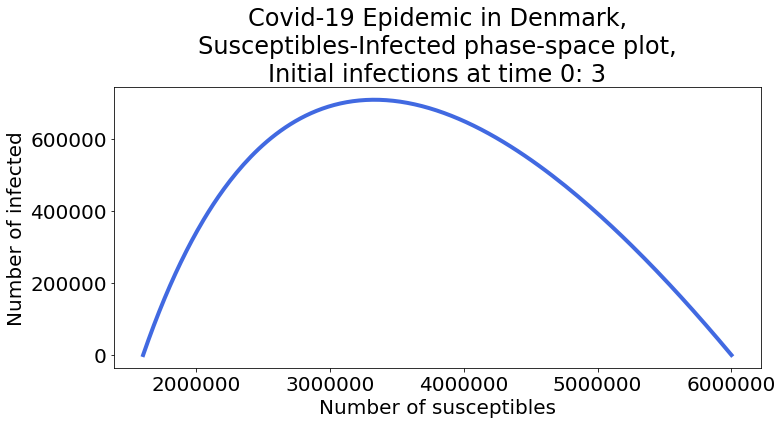

At day 0, then number of infected is: 3.
Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 218.
At peak, 707363 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605406 persons did not get sick, i.e. 26.76% of the Danish population.


In [13]:
# c. Phase space plot:
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
R0 = 0 # initial number of recovered
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
t_max = 1000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

I0 = np.arange(1,16) # range for initial number of infected

for i in range(0,len(I0)):
    N0 = S0 + I0[i] + R0
    z0 = np.array([S0, I0[i], R0])
    b = Q0 * v / S0 # calculate transmission rate (b) with data from the beginning of the pandemic
    par = (b, v) # put parameters in a tuple to use in the ODE

    # Solve the differential equation
    ns = odeint(S_I_R, z0, t, args = par)
    S, I, R = ns.T
    
    # Calculate outbreak numbers:
    outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
    outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
    outbreak_peak = t[np.argmax(I)] # when does it peak?
    Imax = np.int(np.amax(I)) # maximum infected
    outbreak_duration = outbreak_end  - outbreak_start # how long does it last?
    not_sick = np.int(np.amin(S)) # number of susceptible people at equilibrium 
    not_sick_percentage = np.round(100 * not_sick / N0, 2) # find the persentage of not sick and round to 2 decimals
    equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) # day when equations reach equilibrium


    
    # Plot:
    fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
    for i, c in enumerate(ns.T):
        ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=4)

    ax.axvline(outbreak_start, color='firebrick', linestyle=':', label='Outbreak begins')
    ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':', label='Outbreak ends')
    ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=3, label='Outbreak peaks')

    ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
    ax.set_title('Covid-19 Epidemic in Denmark')
    ax.set_xlabel('Time [days]')
    ax.set_ylabel('Number of individuals')
    ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph

      
    # Plot:
    fig, ax = plt.subplots(figsize=(11,6), tight_layout=True)
    ax.plot(ns[:,0], ns[:,1], color = 'royalblue', linewidth=4)
   
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xlabel('Number of susceptibles')
    ax.set_ylabel('Number of infected')
    ax.set_title(f'Covid-19 Epidemic in Denmark,\nSusceptibles-Infected phase-space plot,\nInitial infections at time 0: {I0[i]}')
    plt.show()

    print(f'At day 0, then number of infected is: {I0[i]}.')
    print_parameters()

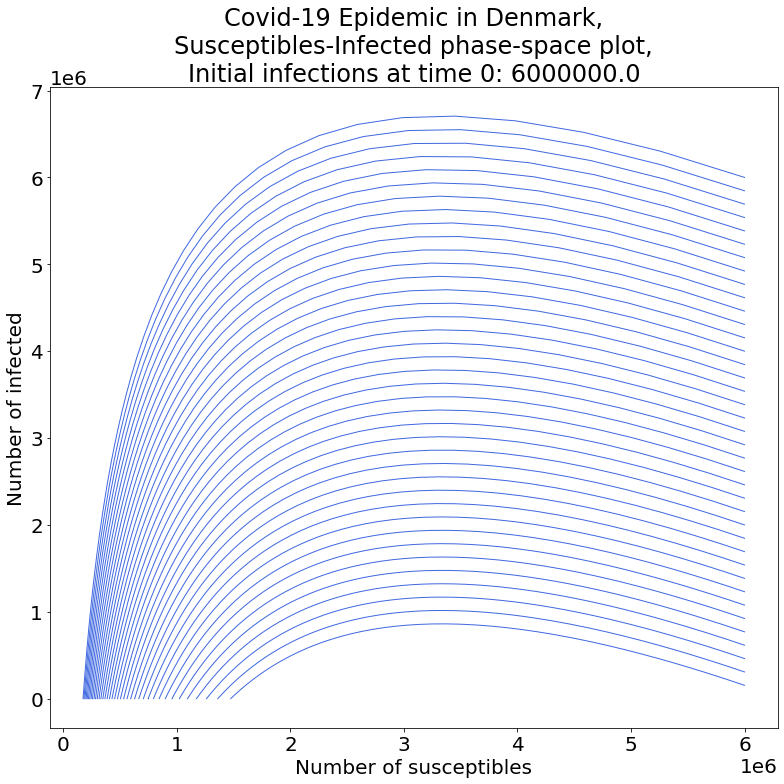

In [14]:
# c. Phase space plot - Cristian's way:
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
R0 = 0 # initial number of recovered
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
t_max = 1000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

I0 = np.linspace(0, int(6e6), 40) # range for initial number of infected

fig, ax = plt.subplots(figsize=(11,11), tight_layout=True)
for i in range(0,len(I0)):
    N0 = S0 + I0[i] + R0
    z0 = np.array([S0, I0[i], R0])
    b = Q0 * v / S0 # calculate transmission rate (b) with data from the beginning of the pandemic
    par = (b, v) # put parameters in a tuple to use in the ODE

    # Solve the differential equation
    ns = odeint(S_I_R, z0, t, args = par)
    S, I, R = ns.T
    
    # Plot:
    ax.plot(S, I, color = 'royalblue', linewidth=1)
   
    ax.set_xlabel('Number of susceptibles')
    ax.set_ylabel('Number of infected')
    ax.set_title(f'Covid-19 Epidemic in Denmark,\nSusceptibles-Infected phase-space plot,\nInitial infections at time 0: {I0[i]}')
    
# Fraction of immunized p = 1-1/Q0 (see page 255 of book)

heard immunity at I=1-1/Q0=0.4444444444444444


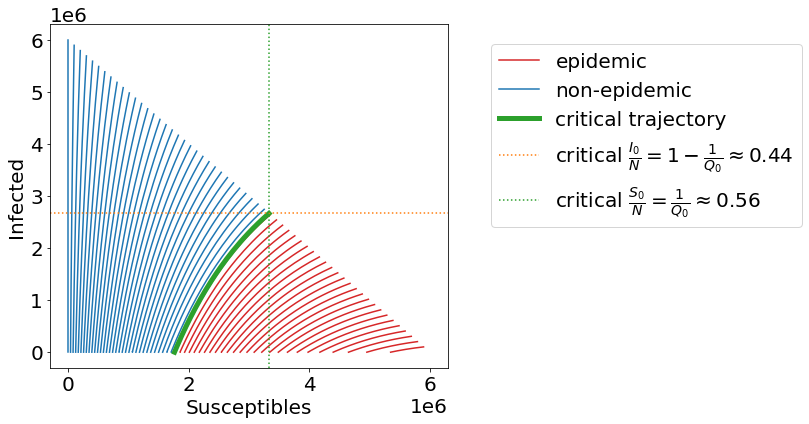

In [15]:
# c. Phase space plot - Cristian's way:
# Parameters
N = 6e6 # total population number
T = 14 # average period of infectivity 

R0 = 0 # initial number of recovered
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic

t_max = 1000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 


print(f"heard immunity at I=1-1/Q0={1-1/Q0}")

fig, ax = plt.subplots(figsize=(14,6), tight_layout=True)

I0s = np.linspace(0, int(6e6), 60)
for I0 in I0s:
    S0 = N-I0 # total susceptibles at the beginning of pandemic in Denmark
    col_cond = (I0/N >= 1-1/Q0)
    c = int(col_cond)*"tab:blue" + (1-int(col_cond))*"tab:red"
        
    #state_init = np.array([N-I0, I0, 0])
    z0 = np.array([S0, I0, R0])
    params = (b, v)

    num_sol = odeint(S_I_R, z0, t, args=params).T
    S, I, R = num_sol
    final_size = 1 - S[-1]/N
    
    lab = int(I0 == I0s[0])*"epidemic" + int(I0 == I0s[-1])*"non-epidemic"
    ax.plot(S, I, color=c, label=lab)
        
heard_immune = (1-1/Q0)
I0 = (1-1/Q0)*N
S0 = N-I0 # total susceptibles at the beginning of pandemic in Denmark
z0 = np.array([S0, I0, R0])
params = (b, v)
    
    
num_sol = odeint(S_I_R, z0, t, args=params).T
S, I, R = num_sol
ax.plot(S, I, color="tab:green", linewidth=5, alpha=1,
        label="critical trajectory")
ax.axhline(N*(1-1/Q0), color="tab:orange", linestyle=":", 
           label="critical $\\frac{I_{0}}{N}=1-\\frac{1}{Q_{0}} \\approx $" + str(round(1-1/Q0,2)))
ax.axvline(N/Q0, color="tab:green", linestyle=":", 
           label="critical $\\frac{S_{0}}{N}=\\frac{1}{Q_{0}} \\approx$"+str(round(1/Q0,2)))

ax.set_xlabel("Susceptibles")
ax.set_ylabel("Infected")
# ax.set_yscale("log")
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside the graph

 

heard immunity at I=1-1/Q0=0.4444444444444444


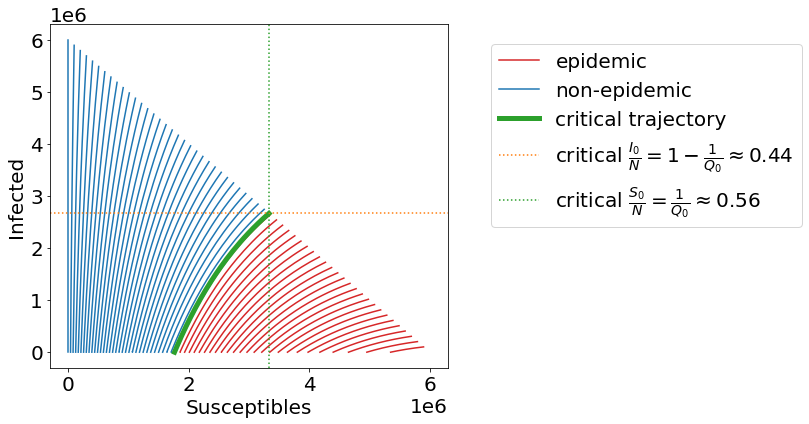

In [16]:
# c. Phase space plot - Cristian's way:
# Parameters
N = 6e6 # total population number
T = 14 # average period of infectivity 

R0 = 0 # initial number of recovered
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic

t_max = 1000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 


print(f"heard immunity at I=1-1/Q0={1-1/Q0}")

fig, ax = plt.subplots(figsize=(14,6), tight_layout=True)

I0s = np.linspace(0, int(6e6), 60)
for I0 in I0s:
    S0 = N-I0 # total susceptibles at the beginning of pandemic in Denmark
    col_cond = (I0/N >= 1-1/Q0)
    c = int(col_cond)*"tab:blue" + (1-int(col_cond))*"tab:red"
        
    #state_init = np.array([N-I0, I0, 0])
    z0 = np.array([S0, I0, R0])
    params = (b, v)

    num_sol = odeint(S_I_R, z0, t, args=params).T
    S, I, R = num_sol
    final_size = 1 - S[-1]/N
    
    lab = int(I0 == I0s[0])*"epidemic" + int(I0 == I0s[-1])*"non-epidemic"
    ax.plot(S, I, color=c, label=lab)
        
heard_immune = (1-1/Q0)
I0 = (1-1/Q0)*N
S0 = N-I0 # total susceptibles at the beginning of pandemic in Denmark
z0 = np.array([S0, I0, R0])
params = (b, v)
    
    
num_sol = odeint(S_I_R, z0, t, args=params).T
S, I, R = num_sol
ax.plot(S, I, color="tab:green", linewidth=5, alpha=1,
        label="critical trajectory")
ax.axhline(N*(1-1/Q0), color="tab:orange", linestyle=":", 
           label="critical $\\frac{I_{0}}{N}=1-\\frac{1}{Q_{0}} \\approx $" + str(round(1-1/Q0,2)))
ax.axvline(N/Q0, color="tab:green", linestyle=":", 
           label="critical $\\frac{S_{0}}{N}=\\frac{1}{Q_{0}} \\approx$"+str(round(1/Q0,2)))

ax.set_xlabel("Susceptibles")
ax.set_ylabel("Infected")
# ax.set_yscale("log")
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 1), borderaxespad=1) # place legend outside the graph

 

Transmission rate β: 2.1428571428571426e-08.
Epidemic peaks at day 218.
At peak, 707363 persons were infected per day.
Epidemic lasts 263 days (I > 0.01 of Imax).
1605406 persons did not get sick, i.e. 26.76% of the Danish population.
Not all critically ill patients (35368) can get intensive care


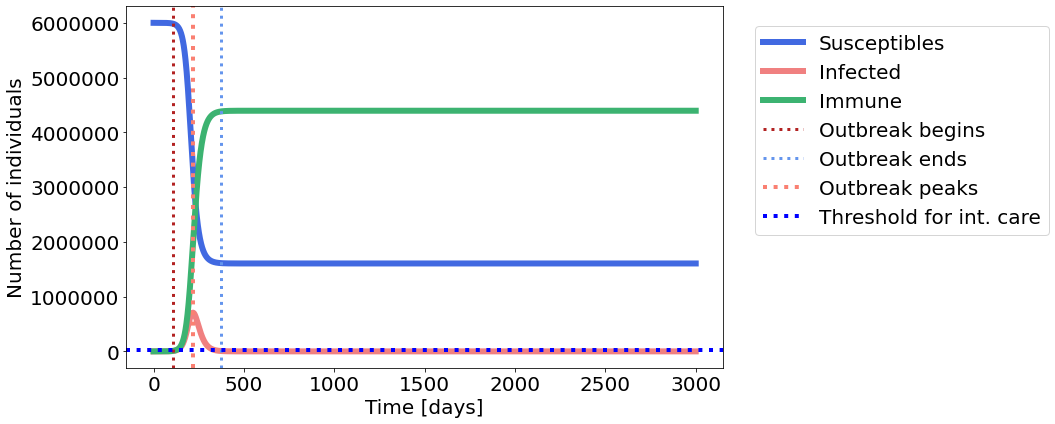

In [17]:
# d. Intensive care

# Parameters
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)

b = (Q0 * v / S0) # I just tried different numbers! not sure if this is what they wanted!
par = (b, v) # put parameters in a tuple to use in the ODE

t_max = 3000
t = np.linspace(0, t_max, t_max + 1) # range for time 

K = 900 # intensive care patient capacity
h = 0.05 # 5% of infected need intensive care

# Solve the differential equation
ns = odeint(S_I_R, z0, t, args = par)
S, I, R = ns.T

# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 

# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')
ax.axhline(18000, color='blue', linestyle=':',linewidth=4, label='Threshold for int. care')


ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1), borderaxespad=1) # place legend outside the graph

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')

Transmission rate β: 1.2857142857142856e-08.
Epidemic peaks at day 1478.
At peak, 16898 persons were infected per day.
Epidemic lasts 2149 days (I > 0.01 of Imax).
5133642 persons did not get sick, i.e. 85.56% of the Danish population.
All critically ill patients (844) can get intentsive care


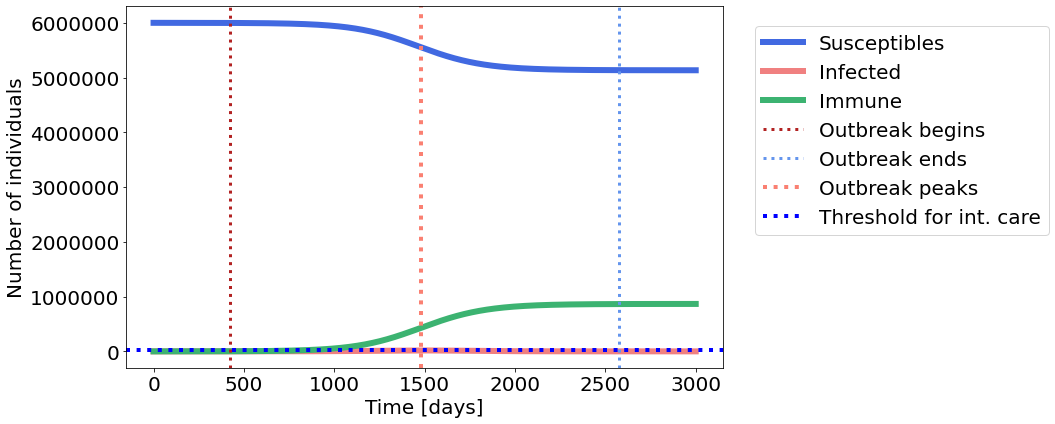

In [18]:
# d. Intensive care

# Parameters
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)

b = (Q0 * v / S0)*0.6 # I just tried different numbers! not sure if this is what they wanted!
par = (b, v) # put parameters in a tuple to use in the ODE

t_max = 3000
t = np.linspace(0, t_max, t_max + 1) # range for time 

K = 900 # intensive care patient capacity
h = 0.05 # 5% of infected need intensive care

# Solve the differential equation
ns = odeint(S_I_R, z0, t, args = par)
S, I, R = ns.T

# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 

# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')
ax.axhline(18000, color='blue', linestyle=':',linewidth=4, label='Threshold for int. care')


ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.3, 1), borderaxespad=1) # place legend outside the graph

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')

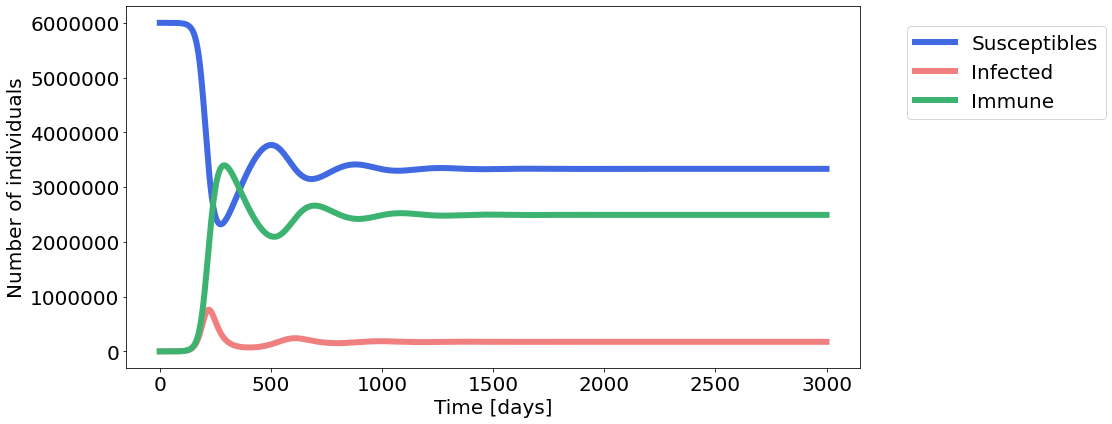

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 220.
At peak, 761396 persons were infected per day.
Epidemic lasts 2890 days (I > 0.01 of Imax).
2320791 persons did not get sick, i.e. 38.68% of the Danish population.
Not all critically ill patients (38069) can get intensive care


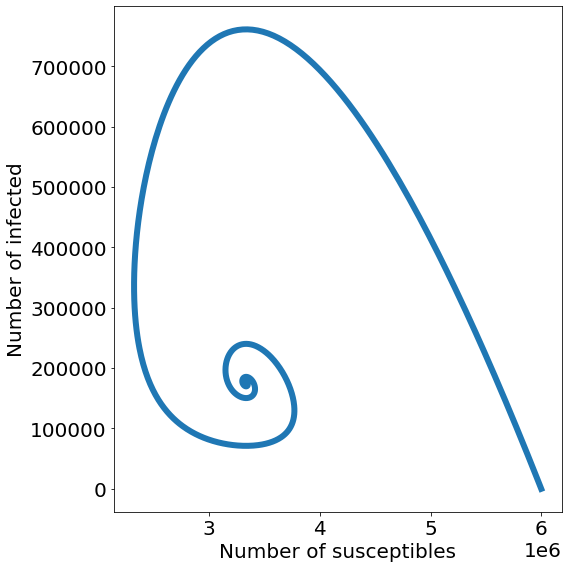

In [48]:
# e. Loss of Immunity

# Define a function with the three SIR equations:
def S_I_R_immunity(z, t, b, v, g):
    S, I, R = z
    dSdt = -b * S * I + g * R
    dIdt = b * S * I - v * I
    dRdt = v * I - g * R
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt


# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

t_max = 3000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 


# Solve the differential equation
ns = odeint(S_I_R_immunity, z0, t, args = par)
S, I, R = ns.T

# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 

# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

# ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
# ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
# ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph
plt.show()

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.ticklabel_format(useOffset=True) # just to show the full numbers and not raised to power
ax.plot(S, I, linewidth = 6)
ax.set_xlabel("Number of susceptibles")
ax.set_ylabel("Number of infected")
plt.show()

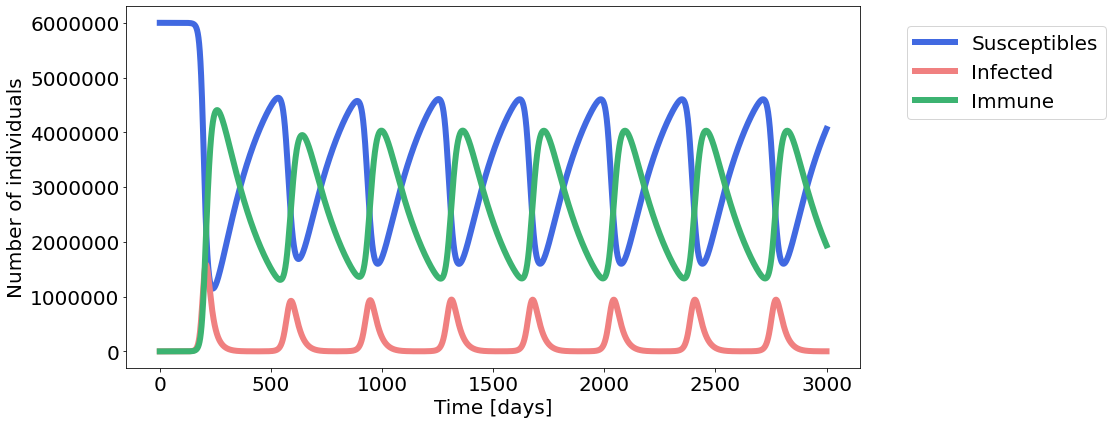

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 208.
At peak, 1586564 persons were infected per day.
Epidemic lasts 2747 days (I > 0.01 of Imax).
1146486 persons did not get sick, i.e. 19.11% of the Danish population.
Not all critically ill patients (79328) can get intensive care


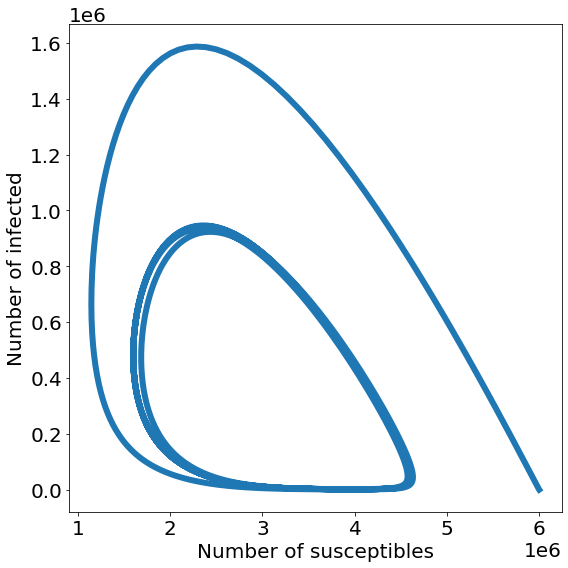

In [47]:
# f. Seasonality

# Define a function with the three SIR equations:
def S_I_R_seasonality(z, t, b, v, g):
    #season = 0.31*(np.sin(((t/365)*2*np.pi)+200)+2) # amalia's
    season = 1 + 0.5*np.cos(2*np.pi*t*1/365 + np.pi) # christian's
    S, I, R = z
    dSdt = -(b*season) * S * I + g * R
    dIdt = (b*season) * S * I - v * I
    dRdt = v * I - g * R
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt


    
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

t_max = 3000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

# Solve the differential equation
ns = odeint(S_I_R_seasonality, z0, t, args = par)
S, I, R = ns.T


# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 


# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

# ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
# ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
# ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph
plt.show()

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I, linewidth = 6)
ax.set_xlabel("Number of susceptibles")
ax.set_ylabel("Number of infected")
plt.show()

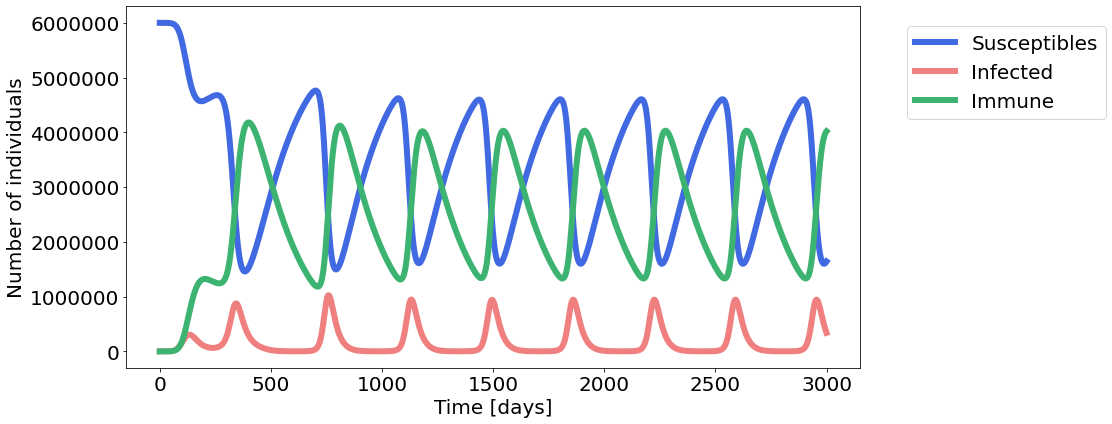

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 759.
At peak, 1026125 persons were infected per day.
Epidemic lasts 2941 days (I > 0.01 of Imax).
1459320 persons did not get sick, i.e. 24.32% of the Danish population.
Not all critically ill patients (51306) can get intensive care


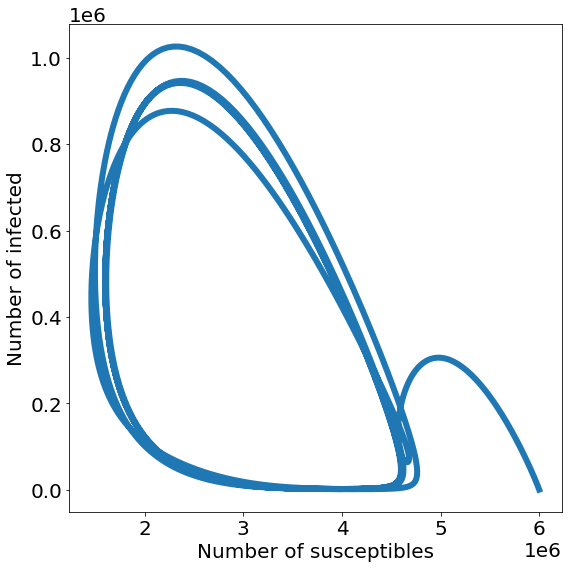

In [52]:
# just trying christian's exact b from his code to see if I get any weird chaos

freq = 1/365

# f. Seasonality

# Define a function with the three SIR equations:
def S_I_R_seasonality(z, t, b, v, g):
    #season = 0.31*(np.sin(((t/365)*2*np.pi)+200)+2) # amalia's
    A = 0.5
    season = (1 + A*np.cos(2*np.pi*t*freq)) # christian's
    S, I, R = z
    dSdt = -(b*season) * S * I + g * R
    dIdt = (b*season) * S * I - v * I
    dRdt = v * I - g * R
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt


    
# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

t_max = 3000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

# Solve the differential equation
ns = odeint(S_I_R_seasonality, z0, t, args = par)
S, I, R = ns.T


# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 


# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

# ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
# ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
# ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph
plt.show()

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I, linewidth = 6)
ax.set_xlabel("Number of susceptibles")
ax.set_ylabel("Number of infected")
plt.show()

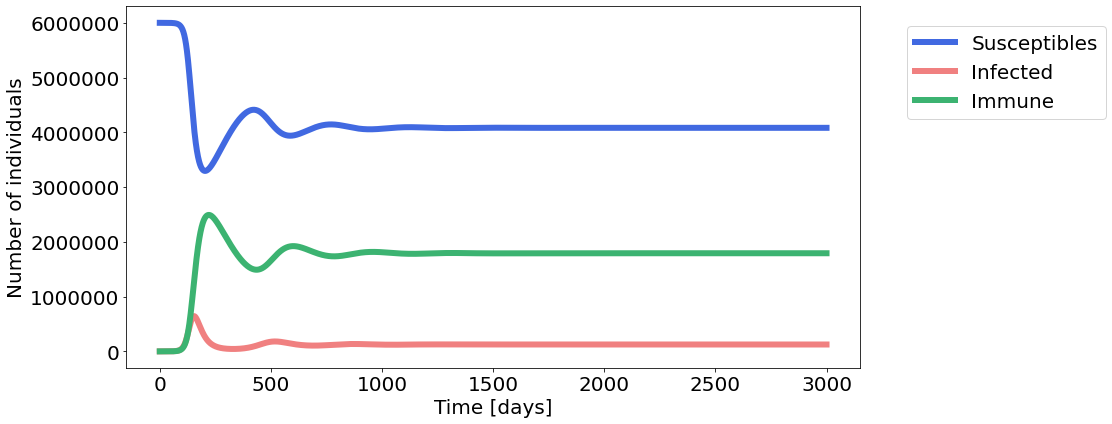

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 154.
At peak, 643628 persons were infected per day.
Epidemic lasts 2926 days (I > 0.01 of Imax).
3295453 persons did not get sick, i.e. 54.92% of the Danish population.
Not all critically ill patients (32181) can get intensive care


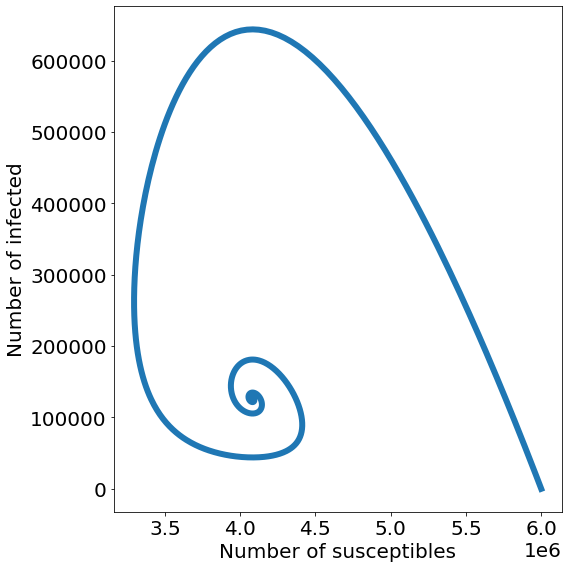

In [50]:
# g. perceived risk of infection # does not work

# Define a function with the three SIR equations:
def S_I_R_risk(z, t, b, v, g):
    S, I, R = z
    risk = S / (5*10e5)
    dSdt = -(b * risk) * S * I + g * R
    dIdt = (b * risk) * S * I - v * I
    dRdt = v * I - g * R
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt


# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

t_max = 3000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

# Solve the differential equation
ns = odeint(S_I_R_risk, z0, t, args = par)
S, I, R = ns.T


# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 


# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=6)

# ax.axvline(outbreak_start, color='firebrick', linestyle=':',linewidth=3, label='Outbreak begins')
# ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':',linewidth=3, label='Outbreak ends')
# ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=4, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
#ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph
plt.show()

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I, linewidth=6)
ax.set_xlabel("Number of susceptibles")
ax.set_ylabel("Number of infected")
plt.show()

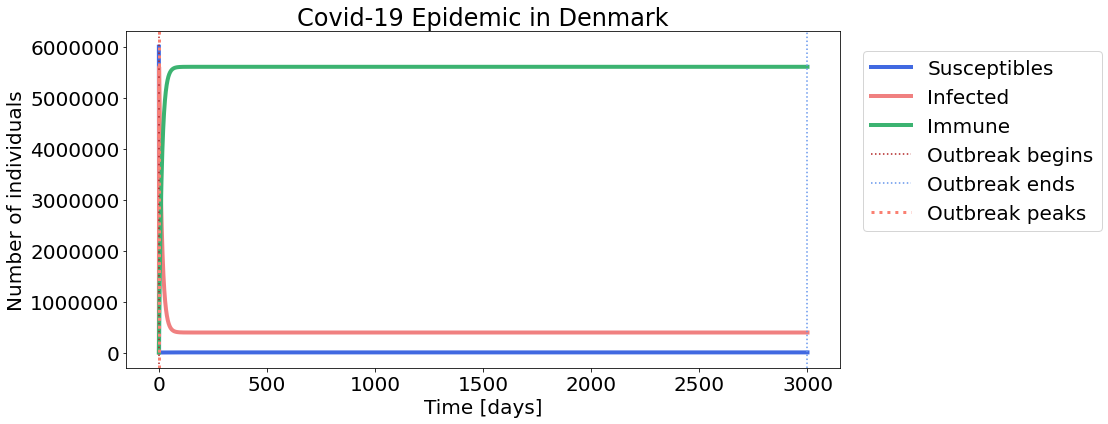

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 1.
At peak, 5602514 persons were infected per day.
Epidemic lasts 2999 days (I > 0.01 of Imax).
38 persons did not get sick, i.e. 0.0% of the Danish population.
Not all critically ill patients (280125) can get intensive care


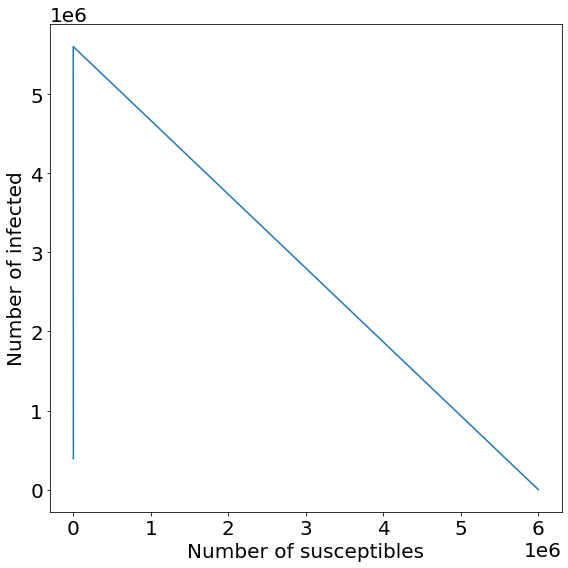

In [45]:
# g. perceived risk of infection # does not work

# Define a function with the three SIR equations:
def S_I_R_risk(z, t, b, v, g):
    S, I, R = z
    risk = 10e5 / I     # GUYS I CANNOT GET THIS TO WORK
    dSdt = -(b * risk) * S * I + g * R
    dIdt = (b * risk) * S * I - v * I
    dRdt = v * I - g * R
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt


# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

t_max = 3000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

# Solve the differential equation
ns = odeint(S_I_R_risk, z0, t, args = par)
S, I, R = ns.T


# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 


# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=4)

ax.axvline(outbreak_start, color='firebrick', linestyle=':', label='Outbreak begins')
ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':', label='Outbreak ends')
ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=3, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph
plt.show()

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I)
ax.set_xlabel("Number of susceptibles")
ax.set_ylabel("Number of infected")
plt.show()

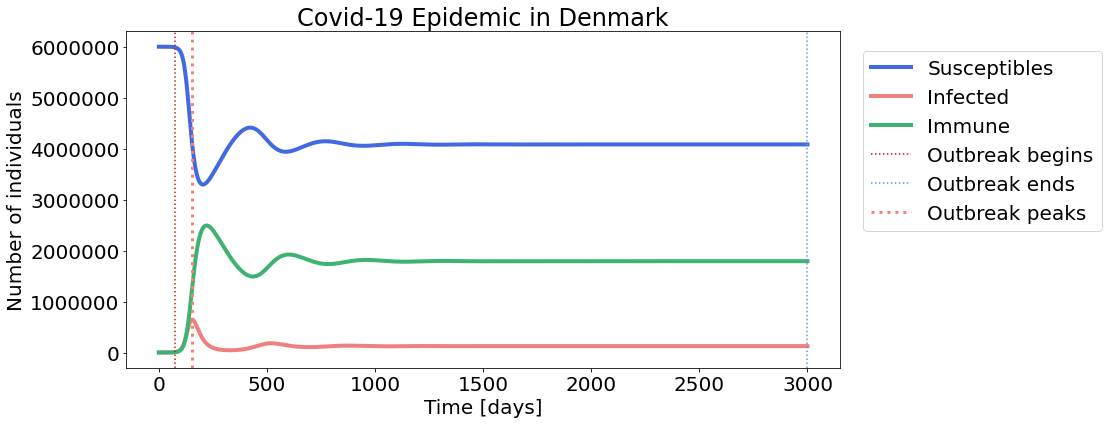

Transmission rate β: 2.1428517857276783e-08.
Epidemic peaks at day 154.
At peak, 643628 persons were infected per day.
Epidemic lasts 2926 days (I > 0.01 of Imax).
3295453 persons did not get sick, i.e. 54.92% of the Danish population.
Not all critically ill patients (32181) can get intensive care


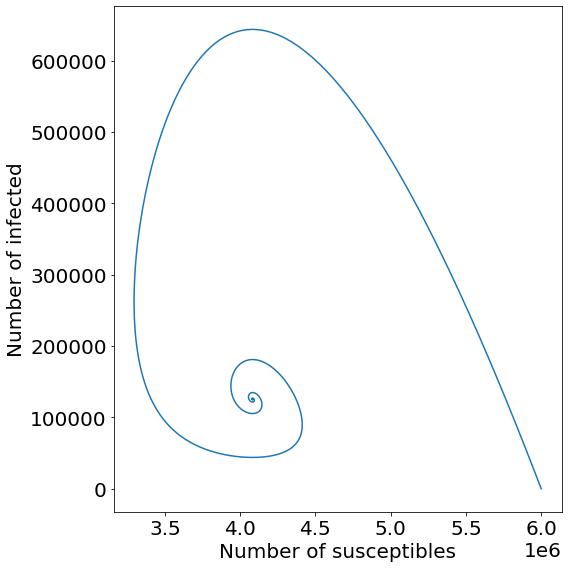

In [22]:
# h. Heterogeneity of contanct patterns

# Define a function with the three SIR equations:
def S_I_R_het(z, t, b, v, g):
    S, I, R = z
    risk = S / (5*10e5)
    dSdt = -(b * risk) * S * I + g * R
    dIdt = (b * risk) * S * I - v * I
    dRdt = v * I - g * R
    dzdt = np.array([dSdt, dIdt, dRdt])
    return dzdt


# Parameters
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

t_max = 3000 # days
t = np.linspace(0, t_max, t_max + 1) # range for time 

# Solve the differential equation
ns = odeint(S_I_R_het, z0, t, args = par)
S, I, R = ns.T


# Calculate outbreak numbers:
outbreak_start = np.amin(np.where(I > np.amax(I)*0.01))
outbreak_end = np.amax(np.where(I > np.amax(I)*0.01))
outbreak_peak = t[np.argmax(I)] 
Imax = np.int(np.amax(I)) 
outbreak_duration = outbreak_end  - outbreak_start 
not_sick = np.int(np.amin(S))  
not_sick_percentage = np.round(100 * not_sick / N0, 2) 
equilibrium_start = np.amin(np.where(S < np.int((np.amin(S))+1))) 


# Plot:
fig, ax = plt.subplots(figsize=(16,6), tight_layout=True)
for i, c in enumerate(ns.T):
    ax.plot(t, c, color = clr[i], label = lbl[i], linewidth=4)

ax.axvline(outbreak_start, color='firebrick', linestyle=':', label='Outbreak begins')
ax.axvline(outbreak_end, color='cornflowerblue', linestyle=':', label='Outbreak ends')
ax.axvline(outbreak_peak, color='salmon', linestyle=':',linewidth=3, label='Outbreak peaks')

ax.ticklabel_format(useOffset=False, style='plain') # just to show the full numbers and not raised to power
ax.set_title('Covid-19 Epidemic in Denmark')
ax.set_xlabel('Time [days]')
ax.set_ylabel('Number of individuals')
ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1), borderaxespad=1) # place legend outside the graph
plt.show()

print_parameters()

critically_ill = np.int(Imax * h)

if critically_ill <= K:
    print(f'All critically ill patients ({critically_ill}) can get intentsive care')
else:
    print(f'Not all critically ill patients ({critically_ill}) can get intensive care')
    
# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I)
ax.set_xlabel("Number of susceptibles")
ax.set_ylabel("Number of infected")
plt.show()

In [23]:
t# # trying things out

# np.int(np.amax(ns[:,1])) # finds maximum of infected array
# np.argmax(ns[:,1]) # finds index of maximum of infected array
# t[np.argmax(ns[:,1])] # finds timepoint of maximum infected
# t[np.int(np.argmax(ns[:,1])*0.8)]
# np.amax(ns[:,1])
# np.amax(ns[:,1])*0.01
# np.where(np.amax(ns[:,1])*0.01)
# ns[:,1] > np.amax(ns[:,1])*0.01
# np.where(ns[:,1] > np.amax(ns[:,1])*0.01)
# np.amax(np.where(ns[:,1] > np.amax(ns[:,1])*0.01))
# np.amin(np.where(ns[:,1] > np.amax(ns[:,1])*0.01))
# ns[:,1][ns[:,1] > np.amax(ns[:,1])*0.01]
# np.int(np.amin(ns[:,0]))
# (ns[:,0] < np.int((np.amin(ns[:,0]))+1)).tolist() # find minimum numbers of susceptibles, make it integer, add one

# # Calculate outbreak numbers:
# outbreak_start = np.amin(np.where(ns[:,1] > np.amax(ns[:,1])*0.01))
# outbreak_end = np.amax(np.where(ns[:,1] > np.amax(ns[:,1])*0.01))
# outbreak_peak = t[np.argmax(ns[:,1])] # when does it peak?
# Imax = np.int(np.amax(ns[:,1])) # maximum infected
# outbreak_duration = outbreak_end  - outbreak_start # how long does it last?
# not_sick = np.int(np.amin(ns[:,0])) # number of susceptible people at equilibrium 
# not_sick_percentage = np.round(100 * not_sick / N0, 2) # find the persentage of not sick and round to 2 decimals
# equilibrium_start = np.amin(np.where(ns[:,0] < np.int((np.amin(ns[:,0]))+1))) # day when equations reach equilibrium

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.998e+03, 2.999e+03,
       3.000e+03])

Text(0, 0.5, '$I$')

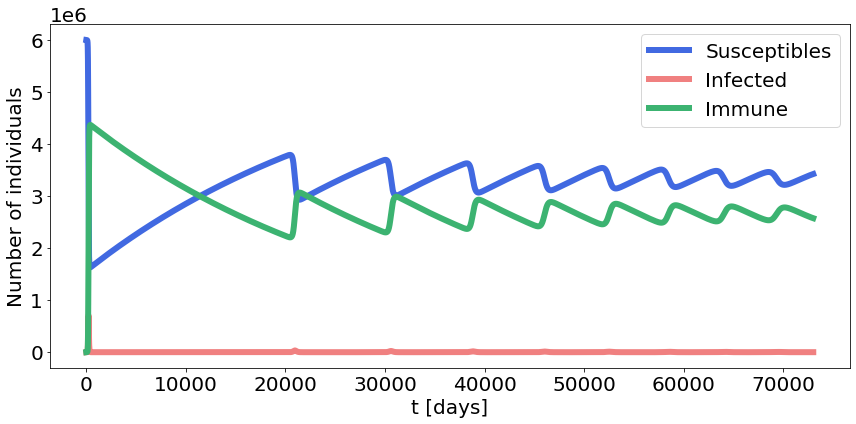

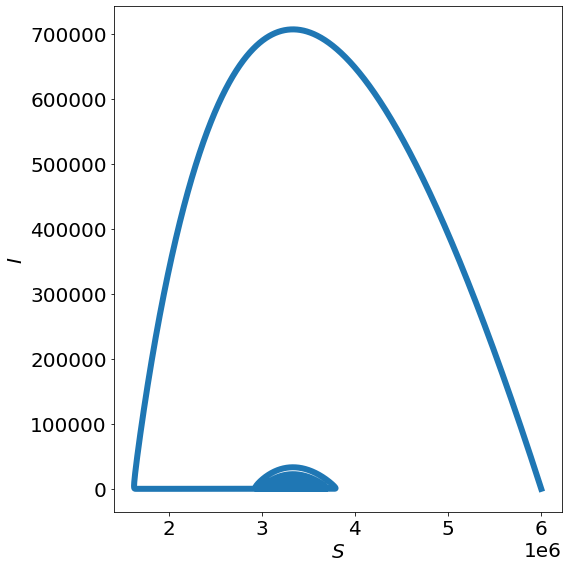

In [56]:
# (j) SIR w. vital dynamics
T = 14 # average period of infectivity 
S0 = 6e6 # total susceptibles at the beginning of pandemic in Denmark
I0 = 15 # initial number of infected
R0 = 0 # initial number of recovered
N0 = S0 + I0 + R0 # total population number
z0 = np.array([S0, I0, R0]) # put all the initial conditions in an array
Q0 = 1.8 # reproductive number at the start of the pandemic in Denmark
v = 1/T # calculate recovery rate (v)
b = Q0 * v / N0 # calculate transmission rate (b) with data from the beginning of the pandemic
g = 0.005 # 1/(365/2)
par = (b, v, g) # put parameters in a tuple to use in the ODE

yr = 365
mu = 1/(80*yr)

I0 = 15

t_max = yr*200
t = np.linspace(0, t_max, 50*t_max) # range for time

def deriv(state, t, beta, nu, mu):
    S, I, R = state
    dS_dt = mu*N - b*S*I - mu*S
    dI_dt = b*S*I - v*I - mu*I
    dR_dt = v*I - mu*R 
    return np.array([dS_dt, dI_dt, dR_dt])

z0 = np.array([S0, I0, R0])
params = (b, v, mu)

num_sol = odeint(deriv, z0, t, args=params).T
S, I, R = num_sol
final_size = 1 - S[-1]/N

# Making a nice plot:
fig, ax = plt.subplots(figsize=(12,6), tight_layout=True)
for i, c in enumerate(num_sol):
    ax.plot(t, c, color=clr[i], label=lbl[i], linewidth=6)

ax.set_xlabel("t [days]")
ax.set_ylabel("Number of individuals")
# ax.set_yscale("log")
ax.legend()

# Making phase-plane plot:
fig, ax = plt.subplots(figsize=(8,8), tight_layout=True)
ax.plot(S, I, linewidth=6)

ax.set_xlabel("$S$")
ax.set_ylabel("$I$")
# ax.set_yscale("log")
# ax.legend()